<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC1</p>
<p style="margin: 0; text-align:right;">2018-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a>fbarbeiro@uoc.edu</a></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Redes neuronales completamente conectadas

En esta práctica implementaremos una red neuronal completamente conectada de dos formas diferentes: 

<ol start="1">
  <li>Partiendo de cero utilizando únicamente la librería numpy</li>
  <li>Utilizando la librería Keras y TensorFlow</li>
</ol>

Posteriormente utilizaremos las dos implementaciones para entrenar dos redes neuronales iguales en un conjunto de datos y compararemos el rendimiento.

**Importante: Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

## 0. Carga de datos

El siguiente código carga los paquetes necesarios para la práctica y además lee los datos que utilizaremos para entrenar la red neuronal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split


with open("data.pickle", "rb") as f:
    data = pickle.load(f)

features = data["features"]
labels = data["labels"]

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2)

## 1. Redes neuronales utilizando numpy 

A continuación implementaremos todas las funciones necesarias para entrenar una red neuronal completamente conectada utilizando únicamente la librería numpy. El objetivo es poder entrenar una red neuronal con cualquier número de capas en la cual la última capa tendrá una única neurona con función de activación sigmoid y las demás capas cualquier número de neuronas con función de activación relu.

La siguiente figura muestra un diagrama de como implementaremos el proceso de entrenamiento de la red neuronal:

<img src="diag.png" alt="Diagrama del entrenamiento de la red neuronal" style="height: 550px;"/>

El desarrollo está estructurado en funciones básicas que se componen según el siguiente esquema:

- L_layer_model
  - initialize_parameters
  - L_model_forward
    - linear_activation_forward
      - linear_forward
      - sigmoid
      - relu
  - compute_cost
  - L_model_backward
    - linear_activation_backward
      - linear_backward
      - sigmoid_backward
      - relu_backward
  - update_parameters
- accuracy

**Notación**:
- Denotamos $L$ el número de capas de la red neuronal.
- La matriz de pesos que conecta una capa con la siguiente la denotamos con la letra $W$, mientras que el vector de bias lo denotamos con la letra $b$.
- Superíndice $[l]$ denota una cantidad asociada con la capa número $l$. 
    - Ejemplo: $a^{[L]}$ denota la salida de la capa número $L$.
    - Ejemplo: Las variables $W^{[L]}$ y $b^{[L]}$ denotan la matriz de pesos y el vector de bias que conectan la capa $L-1$ con la capa $L$ respectivamente.
- Superíndice $(i)$ denota una cantidad asociada con el ejemplo $i$-ésimo. 
    - Ejemplo: $x^{(i)}$ es el ejemplo del conjunto de entrenamiento número $i$.

### 1.1 Inicialización de parámetros

El primer paso para entrenar una red neuronal consiste en inicializar de forma aleatoria los parámetros del modelo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Inicializar las matrices de parámetros y los vectores de bias. Las matrices de pesos se deben inicializar utilizando la distribución normal y los vectores de bias se deben inicializar con ceros. Para las matrices de pesos podéis utilizar 0.1*np.random.randn(shape) indicando el tamaño correcto.
</div>

In [2]:
def initialize_parameters(layer_dims):
    """
    Argumentos:
    layer_dims -- lista que contiene las dimensiones de cada capa de la red
    
    Devuelve:
    parameters -- diccionario que contiene los parametros "W1", "b1", ..., "WL", "bL":
                    Wl -- matriz de pesos de tamaño (layer_dims[l], layer_dims[l-1])
                    bl -- vector de bias de tamaño (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

### 1.2 Propagación hacia delante

En una capa concreta de una red neuronal, las entradas de las neuronas se combinan de forma lineal antes de pasar por la función de activación según la siguiente fórmula:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calcular la combinación lineal de las entradas a una capa de la red neuronal.
</div>

In [3]:
def linear_forward(A, W, b):
    """
    Implementa la parte lineal de la propagación hacia delante de una capa

    Argumentos:
    A -- salida de la capa anterior (o datos de entrada): (número de neuronas de la capa anterior, número de ejemplos)
    W -- matriz de pesos: (número de neuronas de la capa actual, número de neuronas de la capa anterior)
    b -- vector de bias: (número de neuronas de la capa actual, 1)

    Devuelve:
    Z -- la entrada a la función de activación
    cache -- una tripleta que contiene "A", "W" y "b", utilizada después para la propagación hacia atrás
    """
    
    Z = np.dot(W, A) + b
    
    cache = (A, W, b)
    
    return Z, cache

Una vez se ha calculado la combinación lineal de las entradas de una capa se debe aplicar una función de activación no lineal antes de enviar las salidas a la siguiente capa. Si denotamos $g$ la función de activación (en nuestro caso relu o sigmoid), tenemos la siguiente fórmula:

$$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} + b^{[l]})$$

A continuación definimos las funciones de activación que utilizaremos en la red neuronal.

In [4]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0, Z)

    cache = Z
    return A, cache

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calcular la combinación lineal de las entradas utilizando la función implementada anteriormente y aplicar la función de activación no lineal que corresponda.
</div>

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implementa la propagación hacia delante de una capa incluyendo la función de activación

    Argumentos:
    A_prev -- salida de la capa anterior (o datos de entrada): 
                (número de neuronas de la capa anterior, número de ejemplos)
    W -- matriz de pesos: (número de neuronas de la capa actual, número de neuronas de la capa anterior)
    b -- vector de bias: (número de neuronas de la capa actual, 1)
    activation -- el nombre de la función de activación a utilizar en la capa: "sigmoid" o "relu"

    Devuelve:
    A -- la salida de la capa después de aplicar la función de activación
    cache -- una dupla que contiene "linear_cache" y "activation_cache", utilizada después para la propagación hacia atrás
    """
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid":    
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    

    cache = (linear_cache, activation_cache)

    return A, cache

Dados los datos de entrada, la salida de la red neuronal se calcula aplicando diferentes capas una detrás de otra. Si denotamos la última capa como $L$, la salida de la red neuronal se corresponde con la salida de la última capa $A^{[L]}$.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calcular la salida de la red neuronal aplicando $L-1$ capas con función de activación relu y una última capa con función de activación sigmoid.
</div>

In [6]:
def L_model_forward(X, parameters):
    """
    Implementa la propagación hacia delante de la red neuronal completa
    
    Argumentos:
    X -- datos: matriz de tamaño (número de variables, número de ejemplos)
    parameters -- salida de la función initialize_parameters()
    
    Devuelve:
    AL -- salida de la red neuronal
    caches -- lista de caches que contiene todas las caches de la función linear_activation_forward(), las caches
                indexadas de 0 a L-2 corresponden a las caches de la función de activación relu y la cache indexada
                como L-1 corresponde a la cache de la función de activación sigmoid
    """

    caches = []
    A = X
    L = len(parameters) // 2
    
    # Implementa primero las L-1 capas con función de activación relu
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
    
    # Implementa la última capa con función de activación sigmoid
    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    
    return AL, caches

### 1.3 Función de coste

Una vez hemos obtenido la salida de la red neuronal podemos obtener un valor que mida el rendimiento de la red neuronal utilizando una función de coste $\mathcal{L}$. En nuestro caso utilizaremos la función de coste log-loss, que viene definida por la siguiente fórmula:

$$\mathcal{L} = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calcular el valor de la función de coste log-loss dada la salida de la red neuronal junto con las etiquetas correctas.
</div>

In [7]:
def compute_cost(AL, Y):
    """
    Calcula la función de coste

    Argumentos:
    AL -- vector que contiene la salida de la red, corresponde a las probabilidades que predice la red neuronal
            para cada ejemplo: (1, número de ejemplos)
    Y -- vector con las etiquetas correctas para los datos de entrada a la red: (1, número de ejemplos)

    Devuelve:
    cost -- valor de la función de coste log-loss
    """
    
    m = Y.shape[1]

    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    cost = np.squeeze(cost)
    
    return cost

### 1.4 Propagación hacia atrás

Para entrenar una red neuronal es necesario calcular el gradiente de la función de coste repescto a los parámetros de la red, para lo cual utilizaremos la propagación hacia atrás. La propagación hacia atrás consiste en aplicar la regla de la cadena para calcular el gradiente de la función de coste paso a paso en cada capa.

Para aplicar la regla de la cadena en la parte lineal de la neurona, supongamos que ya hemos calculado la derivada $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. Entonces, para calcular las derivadas $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ podemos utilizar las siguientes fórmulas:

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calcular las derivadas de la parte lineal para una sola capa.
</div>

In [8]:
def linear_backward(dZ, cache):
    """
    Implementa la parte lineal de la propagación hacia atrás para una única capa

    Argumentos:
    dZ -- derivada de la función de coste con respecto a la salida lineal de la capa actual
    cache -- tripleta que contiene los valores (A_prev, W, b), provinientes de la función linear_forward

    Devuelve:
    dA_prev -- derivada de la función de coste con respecto a la salida de la capa anterior (l-1): 
                tiene el mismo tamaño que A_prev
    dW -- derivada de la función de coste con respecto a la matriz de pesos W de la capa actual (l):
                tiene el mismo tamaño que W
    db -- derivada de la función de coste con respecto al vector de bias b de la capa actual (l):
                tiene el mismo tamaño que b
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1 / m * dZ @ A_prev.T
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T @ dZ

    return dA_prev, dW, db

El siguiente paso consiste en aplicar la regla de la cadena a la parte no lineal de las neuronas, es decir, a las funciones de activación. Para esto, si denotamos $g$ la función de activación, podemos utilizar la siguiente fórmula:

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

Donde $*$ indica el producto componente a componente.

A continuación calculamos las derivadas de las funciones de activación que utilizamos en la red neuronal.

In [9]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Combinar el cálculo de la derivada de las funciones de activación con la derivada de la parte lineal para obtener, a partir de la derivada de la función de coste respecto la activación de una capa, la derivada de la función de coste respecto a los parámetros de la capa y respecto a las activaciones de la capa anterior.
</div>

In [10]:
def linear_activation_backward(dA, cache, activation):
    """
    Implementa la propagación hacia atrás de una única capa incluyendo la función de activación
    
    Argumentos:
    dA -- derivada de la función de coste con respecto a la salida de la capa actual (l)
    cache -- dupla que contiene "linear_cache" y "activation_cache", provinientes de la función linear_activation_forward
    activation -- el nombre de la función de activación utilizada en la capa actual (l): "sigmoid" o "relu"
    
    Devuelve:
    dA_prev -- derivada de la función de coste con respecto a la salida de la capa anterior (l-1):
                tiene el mismo tamaño que A_prev
    dW -- derivada de la función de coste con respecto a la matriz de pesos W de la capa actual (l):
                tiene el mismo tamaño que W
    db -- derivada de la función de coste con respecto al vector de bias b de la capa actual (l):
                tiene el mismo tamaño que b
    """
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

Por último, es posible calcular la derivada de la función de coste respecto a cualquiera de los parámetros aplicando las funciones recién implementadas empezando por la última capa. Observemos que para inicializar la propagación hacia atrás es necesario calcular primero el valor de $\frac{\partial \mathcal{L}}{\partial A^{[L]}}$.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Aplicar la propagación hacia atrás para calcular el gradiente de la función de coste. Observad que el valor de $\frac{\partial \mathcal{L}}{\partial A^{[L]}}$ viene calculado en la variable dAL y que la última capa tiene función de activación sigmoid mientras que todas las demás tienen función de activación relu.
</div>

In [11]:
def L_model_backward(AL, Y, caches):
    """
    Implementa la propagación hacia atrás de la red neuronal completa
    
    Argumentos:
    AL -- salida de la red neuronal, proviene de la función L_model_forward
    Y -- vector con las etiquetas correctas para cada ejemplo del conjunto de datos: (1, número de ejemplos)
    caches -- lista de caches que contiene todas las caches de la función linear_activation_forward(), las caches
                indexadas de 0 a L-2 corresponden a las caches de la función de activación relu y la cache indexada
                como L-1 corresponde a la cache de la función de activación sigmoid
    
    Devuelve:
    grads -- Un diccionario con las derivadas de la función de coste respecto de cada variable:
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Inicialización de la propagación hacia atrás
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Gradiente de la última capa
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    
    # Gradiente de las capas restantes
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### 1.5 Actualización de parámetros

Una vez disponemos del gradiente de la función de coste podemos utilizar el método del descenso del gradiente para actualizar los parámetros de la red neuronal. Si denotamos $\alpha$ la velocidad de aprendizaje, las fórmulas para aplicar un paso del descenso del gradiente son:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}$$

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Actualizar los parámetros de la red neuronal aplicando un paso del descenso del gradiente.
</div>

In [12]:
def update_parameters(parameters, grads, learning_rate):
    """
    Actualiza los parámetros utilizando el descenso del gradiente
    
    Argumentos:
    parameters -- diccionario que contiene los parámetros de la red neuronal
    grads -- diccionario con las derivadas de la función de coste respecto a cada parámetro,
                corresponde a la salida de la función L_model_backward
    
    Devuelve:
    parameters -- diccionario con los parámetros actualizados:
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

    return parameters

Con todo esto es posible entrenar la red neuronal combinando las funciones definidas anteriormente para aplicar diversas iteraciones del descenso del gradiente e ir actualizando los parámetros de la red de forma reiterada.

El siguiente código muestra cómo entrenar la red neuronal que hemos construido utilizando únicamente la librería numpy.

In [13]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost):
    """
    Implementa una red neuronal de L capas donde las L-1 primeras capas tienen función de activación relu y 
    la última capa tiene función de activación sigmoid.
    
    Argumentos:
    X -- datos: matriz de tamaño (número de variables, número de ejemplos)
    Y -- vector con las etiquetas correctas para cada ejemplo del conjunto de datos: (1, número de ejemplos)
    layers_dims -- lista de longitud (número de capas + 1) que contiene el número de variables y el número 
                    de neuronas en cada capa, 
    learning_rate -- velocidad de aprendizaje para aplicar el método del descenso del gradiente
    num_iterations -- número de pasos para aplicar el descenso del gradiente
    print_cost -- si el valor es True, escribe el valor de la función de coste cada 10 iteraciones
    
    Devuelve:
    parameters -- parámetros ajustados de la red neuronal
    """
    costs = [] 
    # Inicialización de los parámetros
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        # Propagación hacia delante
        AL, caches = L_model_forward(X, parameters)
        
        # Cálculo de la función de coste
        cost = compute_cost(AL, Y)
    
        # Propagación hacia atrás
        grads = L_model_backward(AL, Y, caches)
 
        # Actualización de parámetros
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Escribe el valor de la función de coste cada 10 iteraciones
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    
    # plotando el coste
    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('coste')
        plt.xlabel('iterations (* 10)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters

## 2. Redes neuronales utilizando Keras

A continuación definiremos una red neuronal completamente conectada igual a la que hemos implementado anteriormente pero esta vez utilizando la librería Keras.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Definir una red neuronal completamente conectada a partir de una lista que contiene el número de neuronas que debe tener cada capa de la red. Las primeras capas deben tener función de activación relu y la última capa debe tener función de activación sigmoid. Todas ellas tienen que tener kernel_initializer="random_normal" y bias_initializer="zeros".
</div>

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def keras_model(layers_dims, learning_rate):
    """
    Crea, utilizando Keras, una red neuronal de L capas completamente conectadas donde las L-1 primeras capas
    tienen función de activación relu y la última capa tiene función de activación sigmoid.
    
    Argumentos:
    layers_dims -- lista de longitud (número de capas + 1) que contiene el número de variables y el número 
                    de neuronas en cada capa, 
    learning_rate -- velocidad de aprendizaje para aplicar el método del descenso del gradiente
    
    Devuelve:
    modelo -- objeto de Keras que representa la red neuronal
    """
    
    L = len(layers_dims)
    
    model = Sequential()
    
    # Añadir L-1 capas con función de activación relu y una última capa con función de activación sigmoid,
    # cada capa debe tener el número de neuronas indicado en la variable layers_dims, el tamaño de la capa
    # de entrada viene dado en layers_dims[0]
    
    for l in range(1, L-1):
        model.add(keras.layers.Dense(layers_dims[l], kernel_initializer='random_normal' ,
                bias_initializer='zeros', activation="relu"))

    
    model.add(keras.layers.Dense(layers_dims[L-1], kernel_initializer='random_normal' ,
                bias_initializer='zeros', activation="sigmoid"))
    
    
    model.compile(optimizer=SGD(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


## 3. Entrenamiento de la red neuronal

Con todas las funciones implementadas anteriormente es posible entrenar una red neuronal completamente conectada con cualquier número de capas y cualquier número de neuronas en cada capa.

A continuación definimos la estructura de capas que tendrá la red neuronal.

In [15]:
layers_dims = [100, 20, 5, 1]

Para entrenar la red neuronal que hemos construido únicamente utilizando numpy debemos ejecutar el siguiente código:

Cost after iteration 0: 0.705357
Cost after iteration 10: 0.622551
Cost after iteration 20: 0.473147
Cost after iteration 30: 0.283466
Cost after iteration 40: 0.185952
Cost after iteration 50: 0.143348
Cost after iteration 60: 0.120307
Cost after iteration 70: 0.105508
Cost after iteration 80: 0.094486
Cost after iteration 90: 0.086330
Cost after iteration 100: 0.079594
Cost after iteration 110: 0.074097
Cost after iteration 120: 0.069548
Cost after iteration 130: 0.065886
Cost after iteration 140: 0.062607
Cost after iteration 150: 0.059673
Cost after iteration 160: 0.057019
Cost after iteration 170: 0.054657
Cost after iteration 180: 0.052508
Cost after iteration 190: 0.050478
Cost after iteration 200: 0.048582
Cost after iteration 210: 0.046843
Cost after iteration 220: 0.045192
Cost after iteration 230: 0.043613
Cost after iteration 240: 0.042136


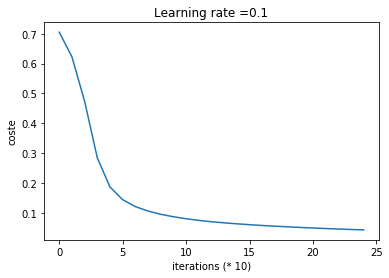

In [16]:
parameters = L_layer_model(train_x.T, train_y.reshape(1, -1), layers_dims=layers_dims, learning_rate=0.1, 
                           num_iterations=250, print_cost=True)

Para entrenar la red neuronal que hemos construido utilizando Keras debemos ejecutar el siguiente código:

In [17]:
model = keras_model(layers_dims = layers_dims, learning_rate = 0.1)
model.fit(train_x, train_y, epochs=250, batch_size=train_x.shape[0], verbose=2)

Epoch 1/250
 - 0s - loss: 0.6932 - acc: 0.4519
Epoch 2/250
 - 0s - loss: 0.6931 - acc: 0.4394
Epoch 3/250
 - 0s - loss: 0.6931 - acc: 0.4363
Epoch 4/250
 - 0s - loss: 0.6930 - acc: 0.4431
Epoch 5/250
 - 0s - loss: 0.6930 - acc: 0.4706
Epoch 6/250
 - 0s - loss: 0.6929 - acc: 0.5100
Epoch 7/250
 - 0s - loss: 0.6928 - acc: 0.5525
Epoch 8/250
 - 0s - loss: 0.6928 - acc: 0.6219
Epoch 9/250
 - 0s - loss: 0.6927 - acc: 0.6550
Epoch 10/250
 - 0s - loss: 0.6926 - acc: 0.6869
Epoch 11/250
 - 0s - loss: 0.6926 - acc: 0.6956
Epoch 12/250
 - 0s - loss: 0.6925 - acc: 0.7025
Epoch 13/250
 - 0s - loss: 0.6924 - acc: 0.7088
Epoch 14/250
 - 0s - loss: 0.6924 - acc: 0.7075
Epoch 15/250
 - 0s - loss: 0.6923 - acc: 0.7031
Epoch 16/250
 - 0s - loss: 0.6922 - acc: 0.7025
Epoch 17/250
 - 0s - loss: 0.6921 - acc: 0.6988
Epoch 18/250
 - 0s - loss: 0.6921 - acc: 0.6969
Epoch 19/250
 - 0s - loss: 0.6920 - acc: 0.6963
Epoch 20/250
 - 0s - loss: 0.6919 - acc: 0.6931
Epoch 21/250
 - 0s - loss: 0.6918 - acc: 0.6938
E

Epoch 171/250
 - 0s - loss: 0.0820 - acc: 0.9644
Epoch 172/250
 - 0s - loss: 0.0813 - acc: 0.9644
Epoch 173/250
 - 0s - loss: 0.0807 - acc: 0.9644
Epoch 174/250
 - 0s - loss: 0.0800 - acc: 0.9650
Epoch 175/250
 - 0s - loss: 0.0794 - acc: 0.9650
Epoch 176/250
 - 0s - loss: 0.0788 - acc: 0.9650
Epoch 177/250
 - 0s - loss: 0.0782 - acc: 0.9650
Epoch 178/250
 - 0s - loss: 0.0776 - acc: 0.9663
Epoch 179/250
 - 0s - loss: 0.0771 - acc: 0.9669
Epoch 180/250
 - 0s - loss: 0.0765 - acc: 0.9669
Epoch 181/250
 - 0s - loss: 0.0760 - acc: 0.9681
Epoch 182/250
 - 0s - loss: 0.0754 - acc: 0.9681
Epoch 183/250
 - 0s - loss: 0.0749 - acc: 0.9681
Epoch 184/250
 - 0s - loss: 0.0744 - acc: 0.9681
Epoch 185/250
 - 0s - loss: 0.0739 - acc: 0.9688
Epoch 186/250
 - 0s - loss: 0.0734 - acc: 0.9688
Epoch 187/250
 - 0s - loss: 0.0729 - acc: 0.9688
Epoch 188/250
 - 0s - loss: 0.0725 - acc: 0.9694
Epoch 189/250
 - 0s - loss: 0.0720 - acc: 0.9694
Epoch 190/250
 - 0s - loss: 0.0715 - acc: 0.9700
Epoch 191/250
 - 0s 

Por último, podemos utilizar la siguiente función para calcular la precisión que obtenemos con la red neuronal construida utilizando únicamente numpy.

In [18]:
def accuracy(X, y, parameters):
    """
    Calcula la precisión de las predicciones de la red neuronal.
    
    Argumentos:
    X -- datos: matriz de tamaño (número de variables, número de ejemplos)
    parameters -- parámetros de la red neuronal entrenada
    
    Returns:
    accuracy -- valor entre 0 y 1 que representa la precisión de la red neuronal
    """
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Propagación hacia delante
    probas, caches = L_model_forward(X, parameters)

    # Conversión de la salida de la red a valores 0 o 1
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
            
    accuracy = np.sum((p == y)) / m
    
    return accuracy

A continuación se muestra la precisión obtenida tanto con la red construida con numpy como con la red construida con Keras.

In [19]:
print("Red construida con numpy")
print("Precisión {:.2f}".format(accuracy(test_x.T, test_y.reshape(1, -1), parameters)))
print("---")
print("Red construida con Keras")
print("Precisión {:.2f}".format(model.evaluate(test_x, test_y, verbose=0)[1]))

Red construida con numpy
Precisión 0.98
---
Red construida con Keras
Precisión 0.98


El siguiente código permite calcular el tiempo que tarda cada red neuronal en entrenarse.

In [20]:
%%timeit
parameters = L_layer_model(train_x.T, train_y.reshape(1, -1), layers_dims=layers_dims, 
                           learning_rate=0.1, num_iterations=250, print_cost=False)

428 ms ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
model = keras_model(layers_dims=layers_dims, learning_rate=0.1)
model.fit(train_x, train_y, epochs=250, batch_size=train_x.shape[0], verbose=0)

998 ms ± 39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Comparar el rendimiento, tanto en tiempo de ejecución como en precisión, de las dos implementaciones de la red neuronal. Utilizar diferentes hiperparámetros en la comparación: probar con diferentes valores para las dimensiones de las capas, diferente número de capas, número de iteraciones, etc. ¿Qué factores pueden estar creando las diferencias observadas?
</div>

En ambos los escenarios, he logrado de obtener una **Precisión de 0.98** tanto en el modelo **Numpy** cuanto en **Keras**.
El tiempo de ejecución inicial fue más rápido en **numpy**.

Antes de adoptar la solución para mirar los hiperparámetros, estuve investigando la posibilidad de usar *GridSearch* o *RandomizedSearchCV* como explicado [aquí](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/). 

Sin embargo, dado la naturaleza de las funciones que habian sido definidas, he optado por adoptar una aproximación mas manual y crear un metodo que prueba de manera random las opciones para cada parámetro disponible, sigue:

In [22]:
from time import time
from scipy.stats import randint
from scipy.stats import uniform as sp_rand
from numpy import random
import warnings

warnings.simplefilter(action='ignore', category=RuntimeWarning)

def test_model(attempts=10, model_name='keras'):
    start = time()

    n_epochs_dist = randint(low=10, high=250)
    n_iterat      = randint(low=10, high=10000)
    lr_dist       = sp_rand(loc=0.001, scale=0.6)

    for l in range(1, attempts):
        layers_dims   = np.append(np.sort(random.randint(low=2, high=100, size=random.randint(8)))[::-1], [1])
        lr            = lr_dist.rvs()
        ep            = n_epochs_dist.rvs()
        n_iter        = n_iterat.rvs()

        if model_name == 'keras':
            model   = keras_model(layers_dims = layers_dims, learning_rate = lr)
            model.fit(train_x, train_y, epochs = ep, batch_size=train_x.shape[0], verbose=0)
            print(l, "- Precisión: {:.2f}, Learn. Rate: {:.3f} / Epoch: {:.3f}"
              .format(model.evaluate(test_x, test_y, verbose=0)[1], lr, ep), 
              'Dim:', len(layers_dims), 'Layer Dim:', layers_dims)
        elif model_name == 'numpy':
            layers_dims = [100, 20, 5, 1]
            parameters   = L_layer_model(train_x.T, train_y.reshape(1, -1), layers_dims=layers_dims, 
                       learning_rate=lr, num_iterations=n_iter, print_cost=False)
            print(l, "- Precisión: {:.2f}, Learn. Rate: {:.3f} / N. Iteraciones: {:.3f}"
            .format(accuracy(test_x.T, test_y.reshape(1, -1), parameters), lr, n_iter))
            
    end = time()
    print("La Ejecución llevó {} segundos".format(end - start))

In [23]:
print("Red construida con Keras")
test_model(model_name='keras')

Red construida con Keras
1 - Precisión: 0.97, Learn. Rate: 0.297 / Epoch: 52.000 Dim: 5 Layer Dim: [73 62 49 39  1]
2 - Precisión: 0.98, Learn. Rate: 0.598 / Epoch: 49.000 Dim: 1 Layer Dim: [1]
3 - Precisión: 0.49, Learn. Rate: 0.049 / Epoch: 168.000 Dim: 6 Layer Dim: [75 71 41 35 12  1]
4 - Precisión: 0.93, Learn. Rate: 0.302 / Epoch: 29.000 Dim: 5 Layer Dim: [94 76 61 26  1]
5 - Precisión: 0.97, Learn. Rate: 0.366 / Epoch: 27.000 Dim: 3 Layer Dim: [85 52  1]
6 - Precisión: 0.49, Learn. Rate: 0.230 / Epoch: 66.000 Dim: 7 Layer Dim: [87 85 67 63 24  7  1]
7 - Precisión: 0.49, Learn. Rate: 0.332 / Epoch: 26.000 Dim: 7 Layer Dim: [77 76 60 32 22  6  1]
8 - Precisión: 0.98, Learn. Rate: 0.119 / Epoch: 244.000 Dim: 1 Layer Dim: [1]
9 - Precisión: 0.47, Learn. Rate: 0.015 / Epoch: 57.000 Dim: 5 Layer Dim: [72 55 48 24  1]
La Ejecución llevó 8.910655975341797 segundos


In [24]:
print("Red construida con Numpy")
test_model(model_name='numpy')

Red construida con Numpy
1 - Precisión: 0.99, Learn. Rate: 0.545 / N. Iteraciones: 8747.000
2 - Precisión: 0.99, Learn. Rate: 0.406 / N. Iteraciones: 397.000
3 - Precisión: 0.51, Learn. Rate: 0.309 / N. Iteraciones: 8366.000
4 - Precisión: 0.99, Learn. Rate: 0.079 / N. Iteraciones: 2551.000
5 - Precisión: 0.51, Learn. Rate: 0.264 / N. Iteraciones: 9809.000
6 - Precisión: 0.99, Learn. Rate: 0.121 / N. Iteraciones: 4112.000
7 - Precisión: 0.99, Learn. Rate: 0.224 / N. Iteraciones: 6921.000
8 - Precisión: 0.99, Learn. Rate: 0.284 / N. Iteraciones: 6091.000
9 - Precisión: 0.51, Learn. Rate: 0.311 / N. Iteraciones: 7668.000
La Ejecución llevó 88.07156705856323 segundos


Como conclusión, es posible recolectar que una mayor cantidad de layers no necesariamente hará con que la precisión de nuestro modelo sea mejor con la implementación utilizando Keras.
Dicho, en el ejemplo 3 arriba, apenas con 3 layers y una baja cantidad en Epoch (27, precisamente) hemos logrado de obtener una precisión de 0.97. Importante resaltar que en ese momento la learning rate estaba en 0.366, que es significativamente alta - o sea, el hecho que la learning rate sea alta también influye directamente en el aumento de precisión.

Finalmente, también he jugado un poco con el parámetro de numero de iteracciones (especialmente para el modelo generado usando las librerias de numpy. Como esperado, cuando la cantidad de iteracciones es alta, la ejecución es también más lenta.

### References
Parte del codigo utilizado para desarrollar esta práctica proviene del curso de Coursera ["Neural networks and deep learning"](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning)